In [579]:
# Python Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import mean_absolute_error,median_absolute_error,confusion_matrix,consensus_score,accuracy_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [580]:
df = pd.read_csv('data/loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [581]:
df.shape

(614, 13)

In [582]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [583]:
# find Missing Value Percentage 
df.isnull().sum()/df.shape[0] * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [584]:
(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100

1.8667000751691305

In [585]:
df.notnull().sum().sum()

7833

In [586]:
df.isnull().sum().sum()

149

<Axes: >

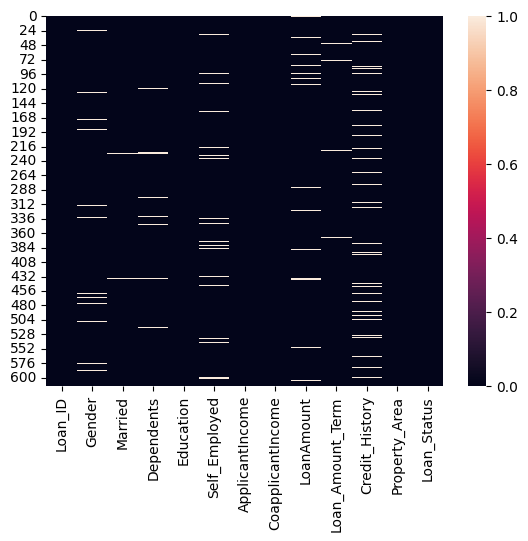

In [587]:
sns.heatmap(df.isnull())

<Axes: >

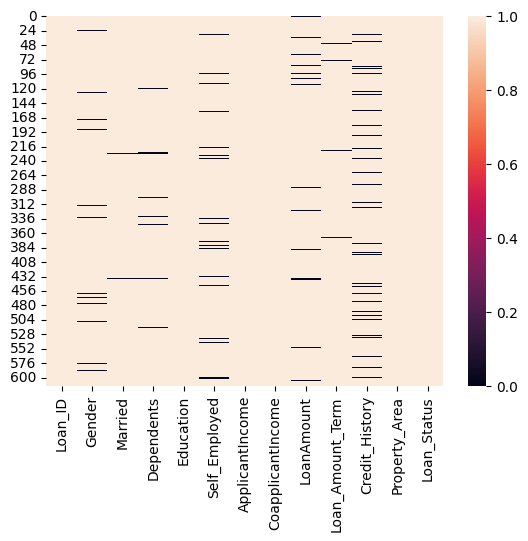

In [588]:
sns.heatmap(df.notnull())

In [589]:
# df.drop(columns=['Credit_History'],inplace=True)

In [590]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [591]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [592]:
# df.dropna(inplace=True)

In [593]:
# sns.heatmap(df.isnull())

In [594]:
# df.shape

In [595]:
(614-523)/614 * 100

14.82084690553746

In [596]:
# df.fillna(10,inplace=True)

In [597]:
# df.isnull().sum()

In [598]:
# filled with forward and Backword .... 

#df.fillna(method='ffill',axis=1) # ( bfill,ffill) axis = 1 for column wise and axis = 0 rows wise 



In [599]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [600]:
# df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [601]:
#df.select_dtypes(include='object').isnull().sum()

# # Select all numeric columns
# numeric_cols = df.select_dtypes(include=['number']).columns
# print(numeric_cols)
# # Output: Index(['A', 'B'], dtype='object')

# # Select all object (string) columns
# object_cols = df.select_dtypes(include=['object']).columns
# print(object_cols)
# # Output: Index(['C'], dtype='object')

# # Select all boolean columns
# bool_cols = df.select_dtypes(include=['bool']).columns
# print(bool_cols)
# # Output: Index(['D'], dtype='object')

In [602]:
# for i in df.select_dtypes(include='object').columns:
#     df[i].fillna(df[i].mode()[0],inplace=True)

In [603]:
# Handling Missing Value ... 
from sklearn.impute import SimpleImputer 


In [604]:
df.select_dtypes(include='float64').columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [605]:
si = SimpleImputer(strategy='mean')
new_df = si.fit(df[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']])

In [606]:
new_df = new_df.transform(df[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']])

In [607]:
new_df = si.fit_transform(df[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']])

In [608]:
new_df = pd.DataFrame(new_df,columns=df.select_dtypes(include='float64').columns)
new_df

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,146.412162,360.0,1.0
1,1508.0,128.000000,360.0,1.0
2,0.0,66.000000,360.0,1.0
3,2358.0,120.000000,360.0,1.0
4,0.0,141.000000,360.0,1.0
...,...,...,...,...
609,0.0,71.000000,360.0,1.0
610,0.0,40.000000,180.0,1.0
611,240.0,253.000000,360.0,1.0
612,0.0,187.000000,360.0,1.0


In [609]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

SimpleImputer()

X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]

print(imp_mean.transform(X))
# [[ 7.   2.   3. ]
#  [ 4.   3.5  6. ]
#  [10.   3.5  9. ]]

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


In [610]:
new_df.isnull().sum()

CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [611]:
# OneHot Encoding .........  

df1 = df
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [612]:
 
df1['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df1['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [613]:
new_data = df1[['Gender','Married']]
new_data.head()

,Gender,Married
0,Male,No
1,Male,Yes
2,Male,Yes
3,Male,Yes
4,Male,No


In [614]:
# pd.get_dummies(new_data)

In [615]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [616]:
ohe = OneHotEncoder(drop='first')
arr = ohe.fit_transform(new_data).toarray()
arr

array([[1., 0.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [0., 0.]])

In [617]:
# new_data = pd.DataFrame(arr,columns=['Gender_Female','Gender_Male','Married_No','Married_Yes'])
new_data = pd.DataFrame(arr,columns=['Gender_Male','Married_Yes'])
new_data

,Gender_Male,Married_Yes
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
609,0.0,0.0
610,1.0,1.0
611,1.0,1.0
612,1.0,1.0


In [618]:
df_new = df
df_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [619]:
from sklearn.preprocessing import LabelEncoder

In [620]:
df_new['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [621]:
le = LabelEncoder()
le.fit_transform(df_new['Property_Area'])

array([2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,

In [622]:
df_new['Property_Area'] = le.fit_transform(df_new['Property_Area'])

In [623]:
# Ordinal Encoding .....
from sklearn.preprocessing import OrdinalEncoder

ord = [['Y','N']]
oe = OrdinalEncoder(categories=ord)    # also using map function map({'Y':0,'N':1})
oe.fit_transform(df_new[['Loan_Status']])

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],

In [624]:
df1 = df
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y


In [625]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000


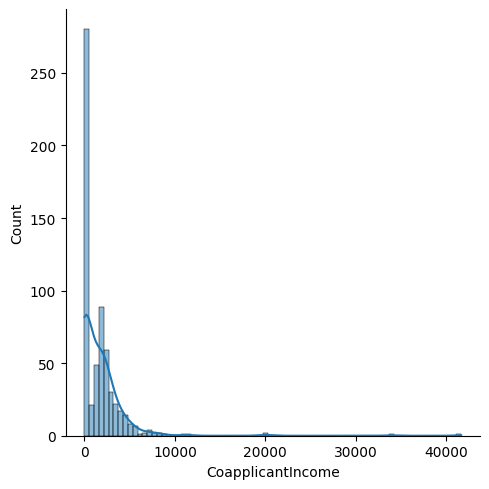

In [626]:
sns.displot(df1['CoapplicantIncome'],kde =True)

<Axes: xlabel='CoapplicantIncome'>

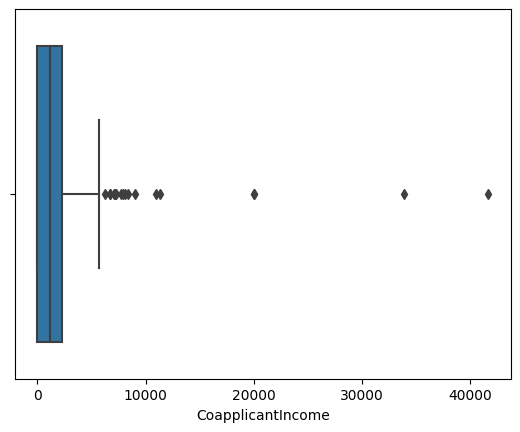

In [627]:
sns.boxplot(x='CoapplicantIncome',data = df1)

<Axes: xlabel='ApplicantIncome'>

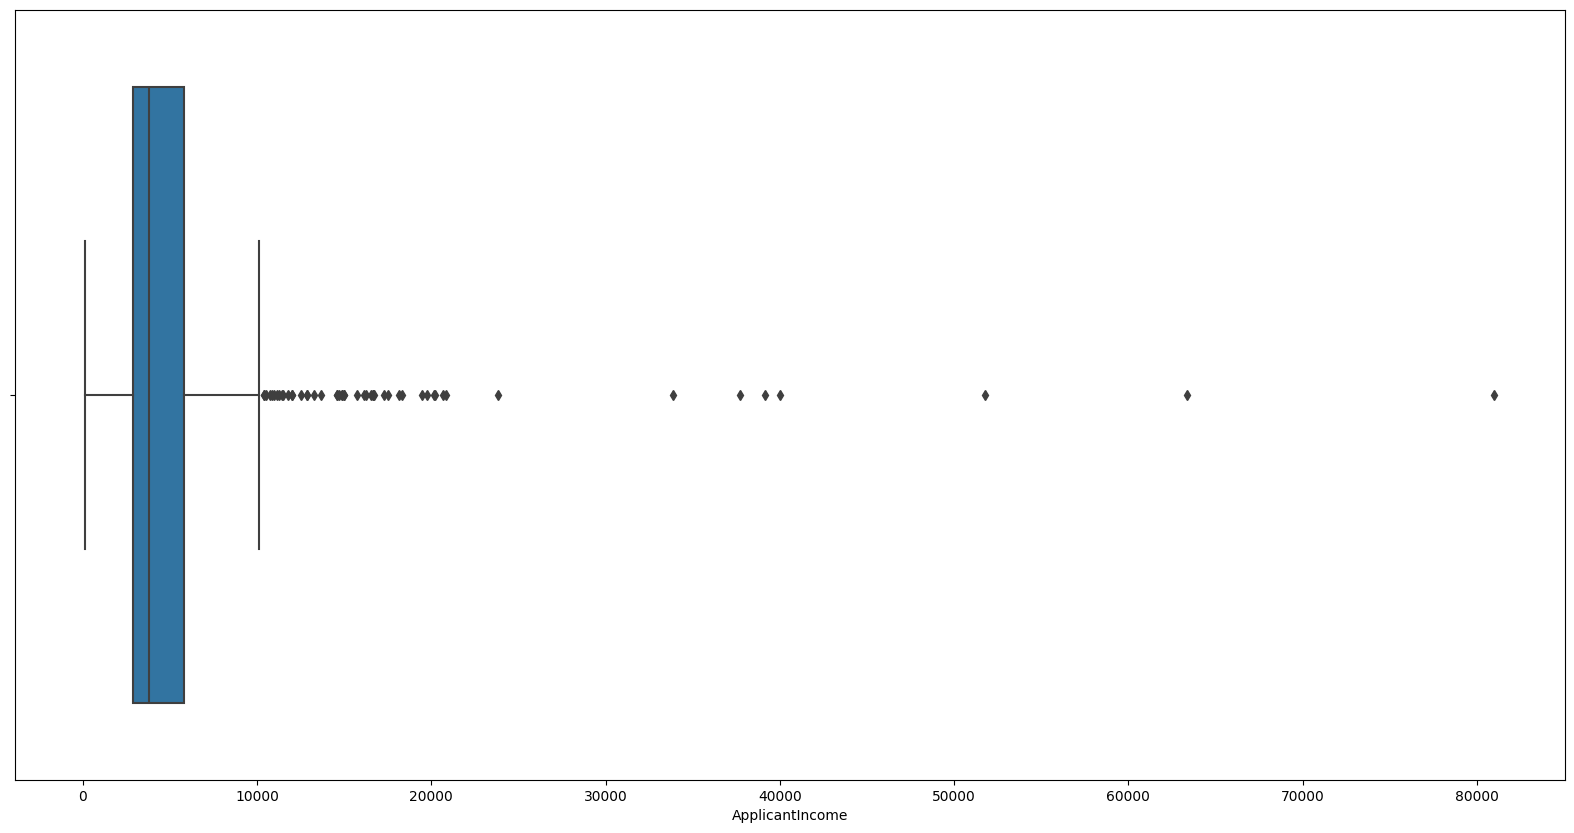

In [628]:
plt.figure(figsize=(20,10))
sns.boxplot(x='ApplicantIncome',data = df1)

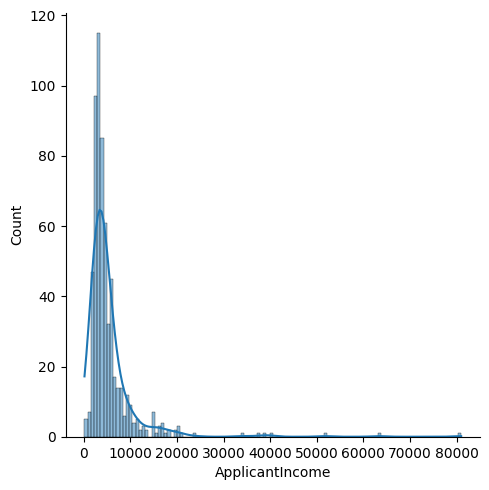

In [629]:
sns.displot(df1['ApplicantIncome'],kde=True)
plt.show()

In [630]:
Q1 = np.percentile(df1['ApplicantIncome'],25)
Q3 = np.percentile(df1['ApplicantIncome'],75)

IQR = Q3 - Q1
IQR

2917.5

In [631]:
# min_outlier 
min_outlier = Q1-1.5*(IQR)
max_outlier = Q3 + 1.5*(IQR)
min_outlier , max_outlier

(-1498.75, 10171.25)

In [632]:
df1.shape

(614, 13)

In [633]:
new_df1 = df1[df1['ApplicantIncome']<=max_outlier]
new_df1.shape

(564, 13)

<Axes: xlabel='ApplicantIncome'>

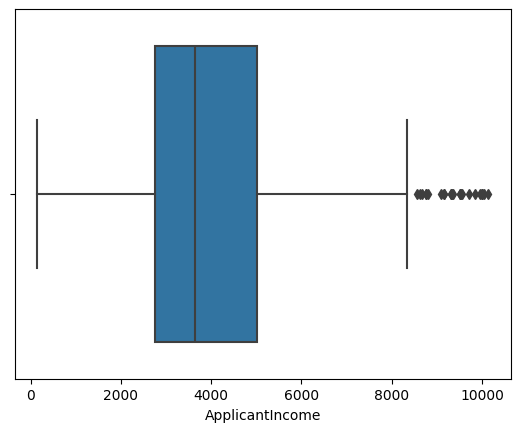

In [634]:
sns.boxplot(x='ApplicantIncome',data = new_df1)

In [635]:
q1 = df1['CoapplicantIncome'].quantile(0.25)
q3 = df1['CoapplicantIncome'].quantile(0.75)

IQR = q3 - q1
IQR

2297.25

In [636]:
# min_outlier 
min_outlier = q1-1.5*(IQR)
max_outlier = q3 + 1.5*(IQR)
min_outlier , max_outlier

(-3445.875, 5743.125)

In [637]:
df1.shape

(614, 13)

In [638]:
new_df1 = df1[df1['CoapplicantIncome']<=max_outlier]
new_df1.shape

(596, 13)

<Axes: xlabel='CoapplicantIncome'>

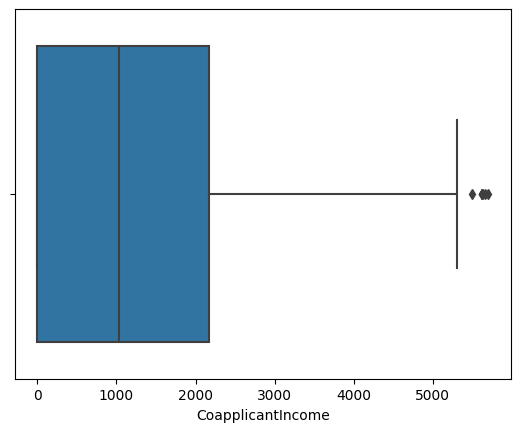

In [639]:
sns.boxplot(x='CoapplicantIncome',data = new_df1)

In [640]:
df1 = df
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y


In [641]:
# Z - Score 
#z = x-u/std

<Axes: xlabel='ApplicantIncome'>

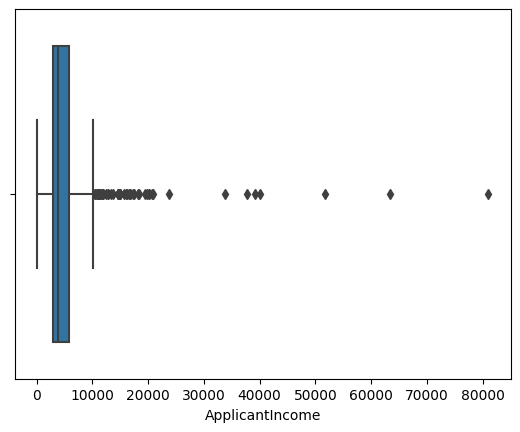

In [642]:
sns.boxplot(x='ApplicantIncome',data =df1)

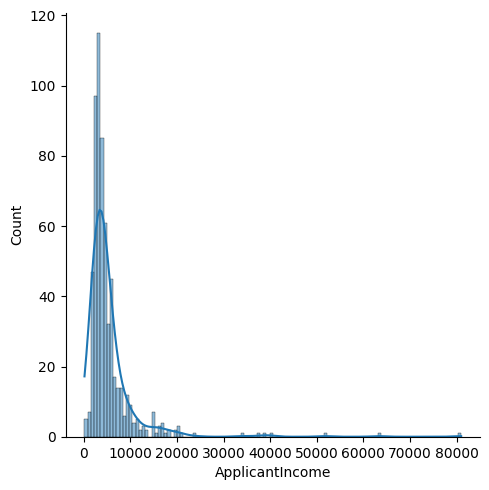

In [643]:
sns.displot(df1['ApplicantIncome'],kde=True)

In [644]:
min_outlier = df1['ApplicantIncome'].mean() - 3 * df1['ApplicantIncome'].std()
max_outlier = df1['ApplicantIncome'].mean() + 3 * df1['ApplicantIncome'].std()

min_outlier , max_outlier

(-12923.66573677391, 23730.584303549156)

In [645]:
new_data  = df1[df1['ApplicantIncome']<=max_outlier]

<Axes: xlabel='ApplicantIncome'>

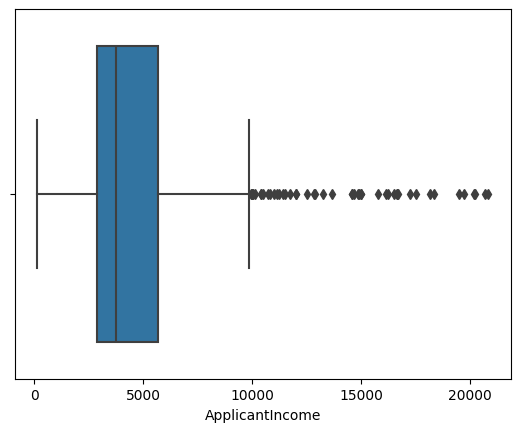

In [646]:
sns.boxplot(x = 'ApplicantIncome',data = new_data)

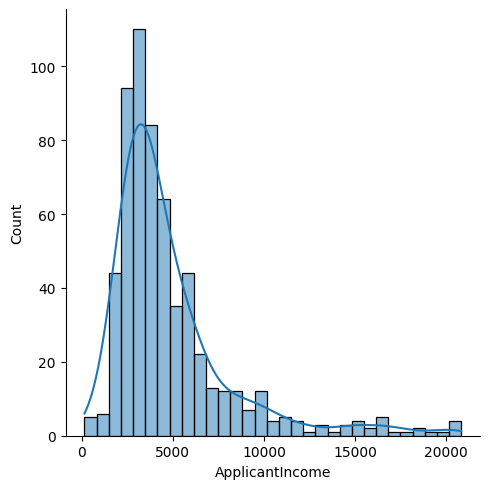

In [647]:
sns.displot(new_data['ApplicantIncome'],kde=True)

In [648]:
z_score = (df1['ApplicantIncome'] - df1['ApplicantIncome'].mean())/df1['ApplicantIncome'].std()
z_score

0      0.072931
1     -0.134302
2     -0.393427
3     -0.461686
4      0.097649
         ...   
609   -0.409796
610   -0.212383
611    0.436818
612    0.356773
613   -0.134302
Name: ApplicantIncome, Length: 614, dtype: float64

In [649]:
df1['z_score']= z_score 
df1[df1['z_score']<3]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y,0.072931
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N,-0.134302
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y,-0.393427
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y,-0.461686
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y,0.097649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,0,Y,-0.409796
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,0,Y,-0.212383
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,2,Y,0.436818
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,2,Y,0.356773


<Axes: xlabel='ApplicantIncome'>

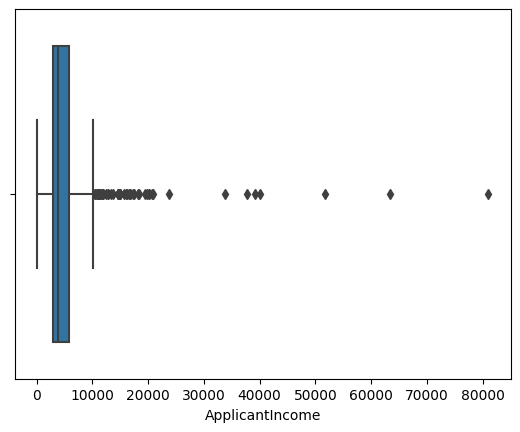

In [650]:
sns.boxplot(x='ApplicantIncome',data = df1)

In [651]:
# Feature Scalling  

df1 = df 
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y,0.072931
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N,-0.134302
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y,-0.393427
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y,-0.461686
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y,0.097649


In [652]:
# standarazation or Normalization 
 
# x_new = x - x_mean /std  ( standarazation ) 

In [653]:
from sklearn.preprocessing import StandardScaler 

ss = StandardScaler()

In [654]:
ss.fit_transform(df1[['ApplicantIncome']])

array([[ 7.29908229e-02],
       [-1.34411954e-01],
       [-3.93747337e-01],
       [-4.62062470e-01],
       [ 9.77284368e-02],
       [ 2.21831139e-03],
       [-5.03018784e-01],
       [-3.87849628e-01],
       [-2.28939128e-01],
       [ 1.21845703e+00],
       [-3.60982286e-01],
       [-4.75659966e-01],
       [-3.81788093e-01],
       [-5.81654908e-01],
       [-6.72414101e-01],
       [-7.42880841e-02],
       [-2.96107483e-01],
       [-3.10196456e-01],
       [-8.46090753e-02],
       [-4.59277440e-01],
       [ 3.69678365e-01],
       [ 9.03563002e-02],
       [-4.59277440e-01],
       [-3.33951118e-01],
       [-2.76284627e-01],
       [ 6.80946355e-01],
       [-4.26676214e-01],
       [-1.92897571e-01],
       [-6.48987089e-01],
       [-2.70878394e-01],
       [-2.02727086e-01],
       [-3.66388519e-01],
       [-1.16555001e-01],
       [-3.11834708e-01],
       [ 1.16259261e+00],
       [-5.12520649e-01],
       [-5.85750540e-01],
       [-2.84475890e-01],
       [-2.0

In [655]:
df1['ApplicantIncome_ss'] = ss.fit_transform(df1[['ApplicantIncome']])
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y,0.072931,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N,-0.134302,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y,-0.393427,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y,-0.461686,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y,0.097649,0.097728


In [656]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,z_score,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,6.140000e+02,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,-3.761016e-17,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,1.000000e+00,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,-8.599482e-01,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,-4.134788e-01,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,-2.604270e-01,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,6.409200e-02,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.237453e+01,1.238462e+01


In [657]:
# try:
#     plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

#     plt.subplot(1, 2, 1)
#     plt.title('Before')
#     sns.displot(df1['ApplicantIncome_ss'], kde=True)

#     plt.subplot(1, 2, 2)
#     plt.title('After')
#     sns.displot(df1['ApplicantIncome'], kde=True)

#     plt.tight_layout()
#     plt.show()

# except KeyError as e:
#     print(f"Error: Column '{e.args[0]}' not found in the DataFrame.")
# except ValueError as e:
#     print(f"Error: {e}")

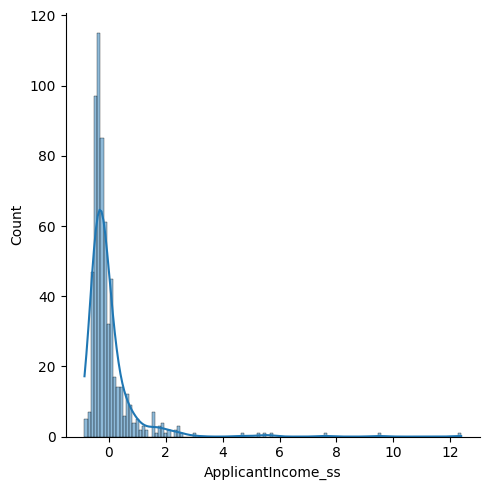

In [658]:
# plt.subplot(1, 2, 1)
# plt.title('Before')
sns.displot(df1['ApplicantIncome_ss'], kde=True)

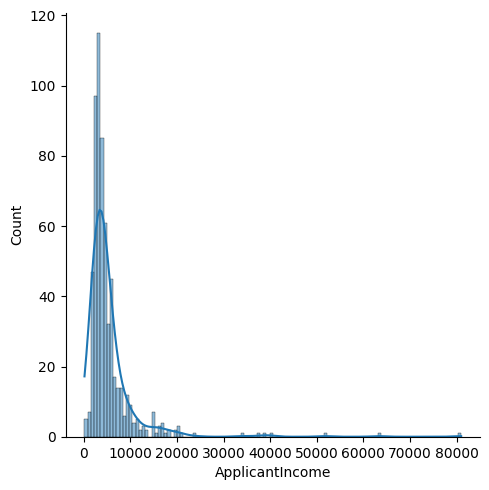

In [659]:
sns.displot(df1['ApplicantIncome'], kde=True)

In [660]:
df = pd.read_csv('data/loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [661]:
from sklearn.preprocessing import MinMaxScaler
#x-new = x - x_min / x_max - x_min  ( Normalization )
mms = MinMaxScaler()
mms.fit(df[['ApplicantIncome']])

MinMaxScaler()

In [662]:
df['ApplicantIncome1'] = mms.transform(df[['ApplicantIncome']])

In [663]:
mms.transform(df[['ApplicantIncome']])

array([[7.04885591e-02],
       [5.48299320e-02],
       [3.52504638e-02],
       [3.00927644e-02],
       [7.23562152e-02],
       [6.51453309e-02],
       [2.70006184e-02],
       [3.56957328e-02],
       [4.76932591e-02],
       [1.56969697e-01],
       [3.77241806e-02],
       [2.90661719e-02],
       [3.61533704e-02],
       [2.10636982e-02],
       [1.42115028e-02],
       [5.93692022e-02],
       [4.26221398e-02],
       [4.15584416e-02],
       [5.85899814e-02],
       [3.03030303e-02],
       [9.28880643e-02],
       [7.17996289e-02],
       [3.03030303e-02],
       [3.97649969e-02],
       [4.41187384e-02],
       [1.16388374e-01],
       [3.27643785e-02],
       [5.04143476e-02],
       [1.59802103e-02],
       [4.45269017e-02],
       [4.96722325e-02],
       [3.73160173e-02],
       [5.61781076e-02],
       [4.14347557e-02],
       [1.52752010e-01],
       [2.62832406e-02],
       [2.07544836e-02],
       [4.35003092e-02],
       [4.96722325e-02],
       [4.45021645e-02],


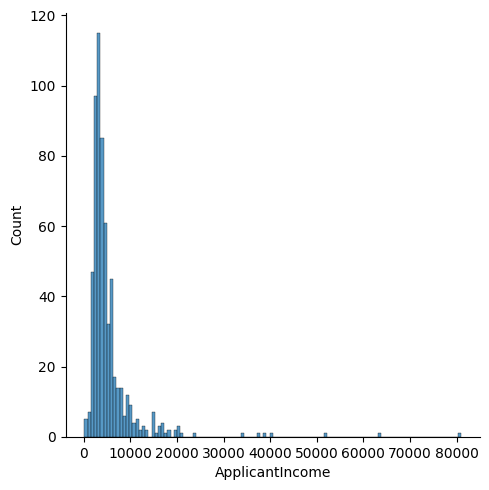

In [664]:
#plt.figure(figsize=(10,5))
sns.displot(df['ApplicantIncome'])

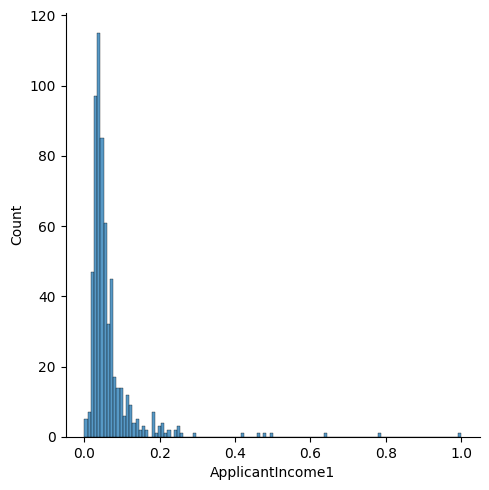

In [665]:
sns.displot(df['ApplicantIncome1'])

In [666]:
df = pd.read_csv('data/loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [667]:
df.drop_duplicates(inplace=True)
#df.duplicated()


In [668]:
df.shape

(614, 13)

In [669]:
# Data Replace & Data type changed ......

In [670]:
#df['LoanAmount'].replace('','1',inplace=True)
# df['LoanAmount'] = df['LoanAmount'].astype('int64')

In [671]:
# Function transofrm ..... 

In [672]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [673]:
from sklearn.preprocessing import FunctionTransformer # using without remove outliers 

ft = FunctionTransformer(func=np.log1p) # func = lambda x: x ** 2

In [674]:
ft.fit(df[['CoapplicantIncome']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [675]:
ft.transform(df[['CoapplicantIncome']])

,CoapplicantIncome
0,0.000000
1,7.319202
2,0.000000
3,7.765993
4,0.000000
...,...
609,0.000000
610,0.000000
611,5.484797
612,0.000000


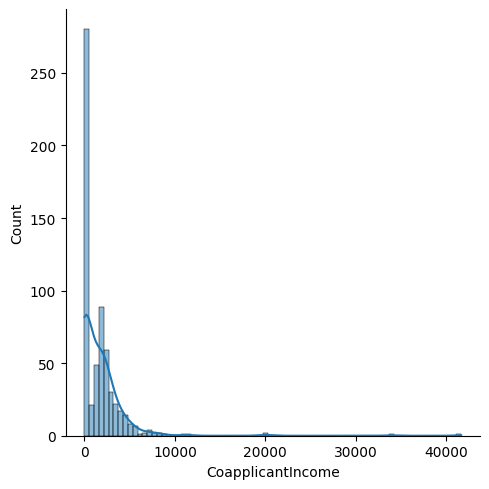

In [676]:
sns.displot(df['CoapplicantIncome'],kde=True)

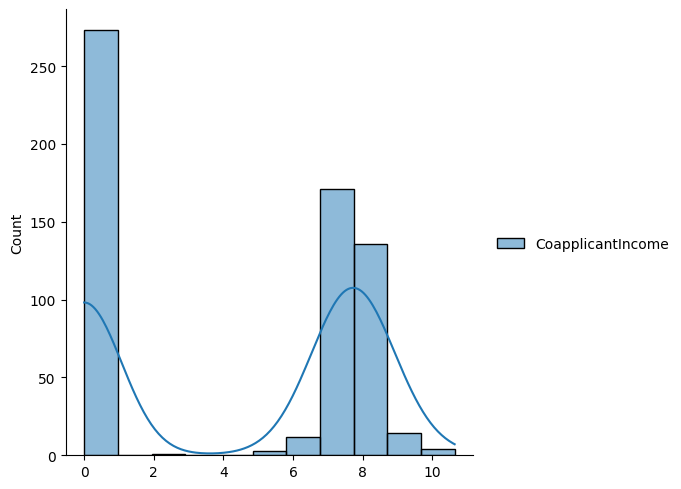

In [677]:
sns.displot(ft.transform(df[['CoapplicantIncome']]),kde=True)

In [678]:
# Forward & Backward Elimination  
from mlxtend.feature_selection import SequentialFeatureSelector
import seaborn as sns
from sklearn.datasets import load_diabetes
import pandas as pd

In [679]:
#pip install mlxtend
data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [680]:
x = data.data 
y = data.target

In [681]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [682]:
fs = SequentialFeatureSelector(lr,k_features=5,forward=True)
fs.fit(x,y)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:73

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(5, 5),
                          scoring='accuracy')

In [683]:
fs.feature_names
fs.k_feature_names_

('0', '1', '3', '8', '9')

In [684]:
fs.k_score_

0.015832482124616958

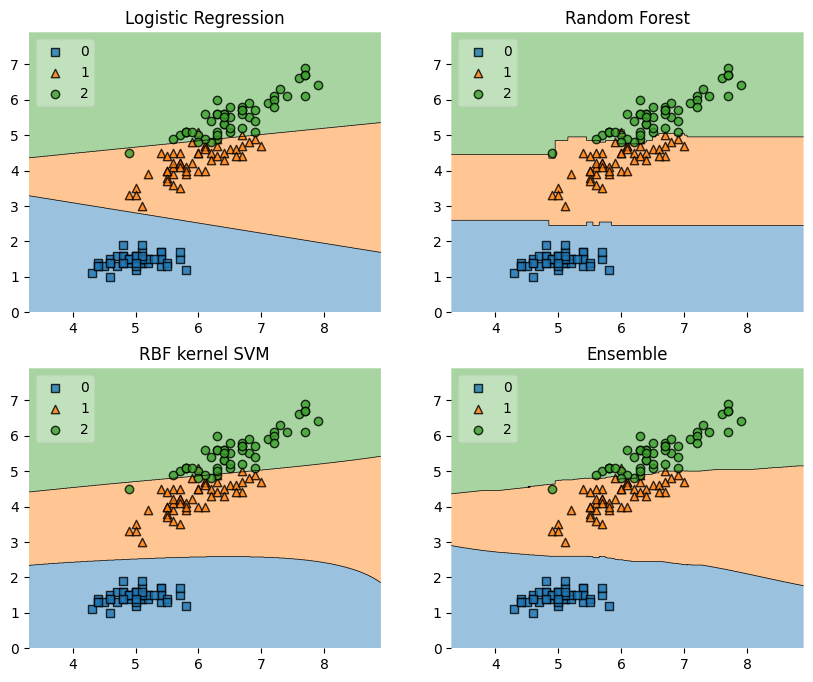

In [685]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [686]:
df = pd.read_csv('data/loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [687]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


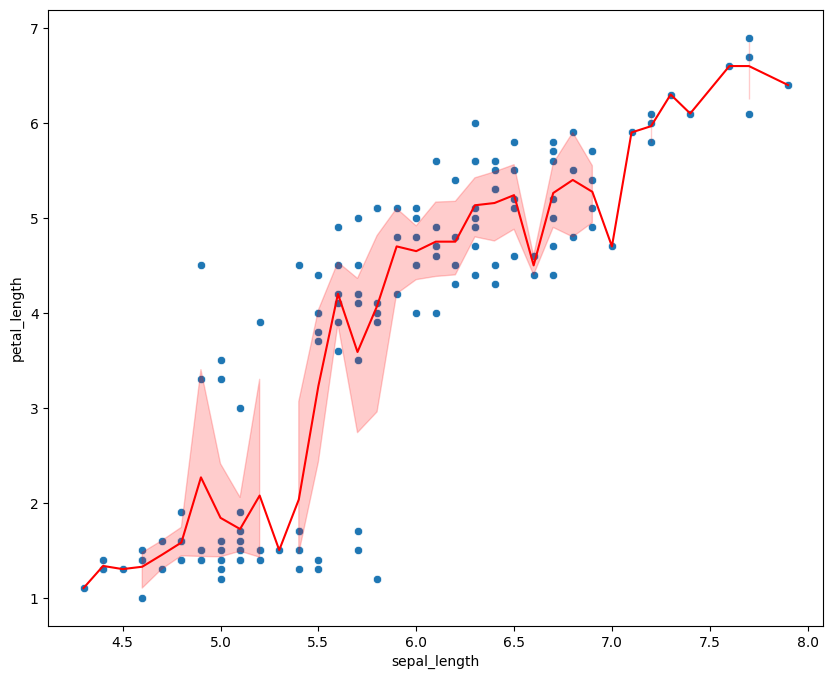

In [688]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='sepal_length',y='petal_length',data = data)
sns.lineplot(x='sepal_length',y='petal_length',data = data,c='red')
plt.show()

In [689]:
x = data[['sepal_length']]
y = data[['petal_length']]
y

,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4


In [690]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)


In [691]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

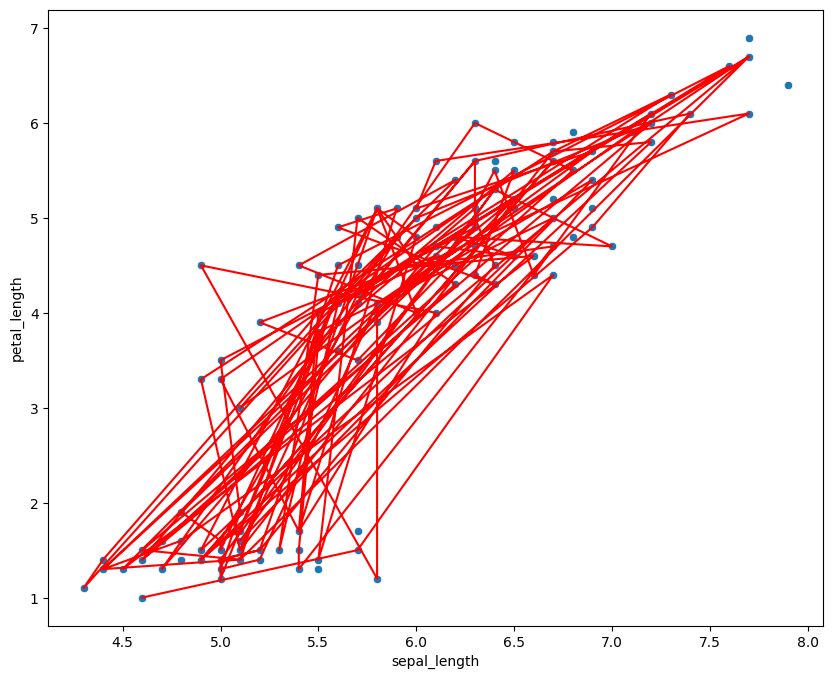

In [692]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='sepal_length',y='petal_length',data = data)
plt.plot(X_train,y_train,c='red')
plt.show()

In [693]:
X_test

,sepal_length
73,6.1
18,5.7
118,7.7
78,6.0
76,6.8
31,5.4
64,5.6
141,6.9
68,6.2
82,5.8


In [694]:
y_test

,petal_length
73,4.7
18,1.7
118,6.9
78,4.5
76,4.8
31,1.5
64,3.6
141,5.1
68,4.5
82,3.9


In [695]:
lr.predict([[6.1]]),lr.predict([[4.8]])

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([[4.26004412]]), array([[1.87589274]]))

In [696]:
lr.score(X_test,y_test)

0.8181245472591437

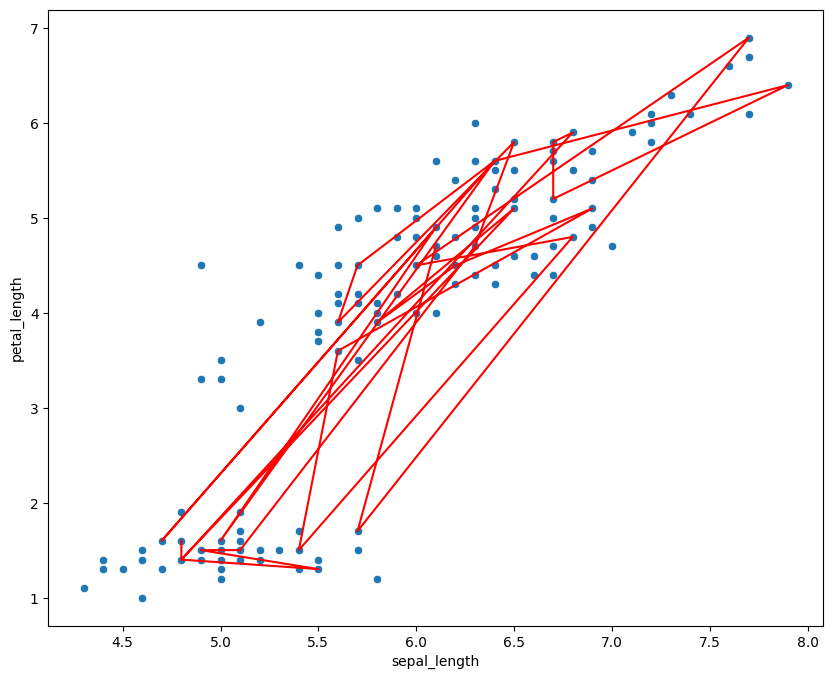

In [697]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='sepal_length',y='petal_length',data = data)
plt.plot(X_test,y_test,c='red')
plt.show()

In [698]:
pre = lr.predict(X_test)

In [699]:
lr.score(pre,y_test)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-3.099222350025565

In [700]:
lr.coef_

array([[1.8339626]])

In [701]:
lr.intercept_

array([-6.92712773])

In [702]:
#Y = M * X + C
1.8339626 * 6.8 + (-6.92712773)

5.54381795

In [703]:
pre = lr.predict(x)

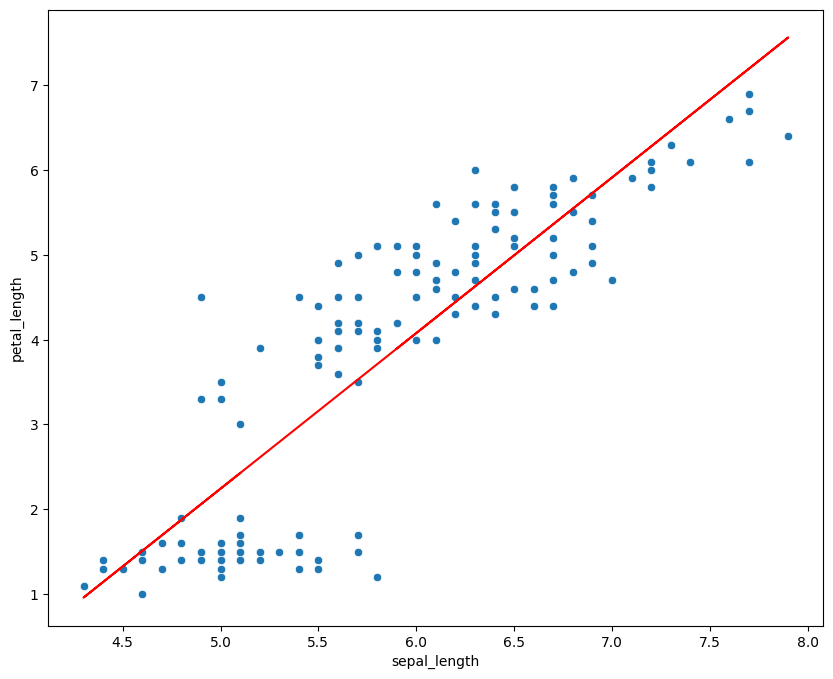

In [704]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='sepal_length',y='petal_length',data = data)
plt.plot(data['sepal_length'],pre,c='red')
plt.show()

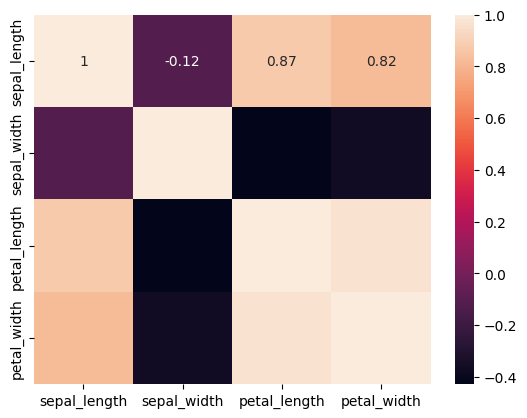

In [705]:
data.drop(columns=['species'],inplace=True)
sns.heatmap(data=data.corr(),annot=True)
plt.show()

In [706]:
# Polynomial Regression 

from sklearn.preprocessing import PolynomialFeatures 

pf = PolynomialFeatures(degree=2)
pf.fit(x)
x = pf.transform(x)

In [707]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [708]:
lr.fit(X_train,y_train)

LinearRegression()

In [709]:
lr.score(X_test,y_test)

0.8366577519419458

In [710]:
pre = lr.predict(x)

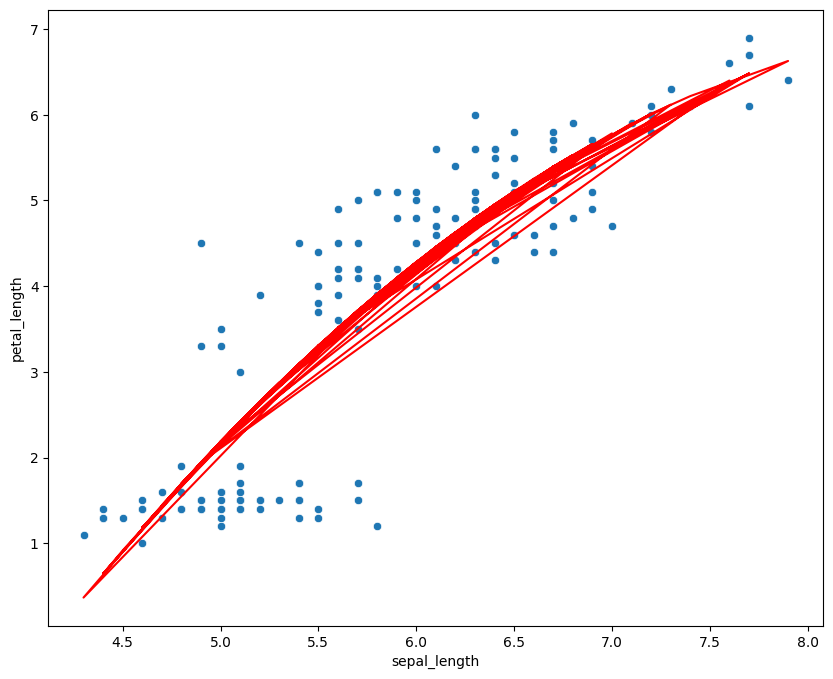

In [711]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='sepal_length',y='petal_length',data = data)
plt.plot(data['sepal_length'],pre,c='red')
plt.show()

In [712]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [713]:
data = pd.read_csv('data/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [714]:
data['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [715]:
data['mainroad'] = data['mainroad'].map({'yes':1,'no':0})
data['guestroom'] = data['guestroom'].map({'yes':1,'no':0})
data['basement'] = data['basement'].map({'yes':1,'no':0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes':1,'no':0})
data['airconditioning'] = data['airconditioning'].map({'yes':1,'no':0})
data['prefarea'] = data['prefarea'].map({'yes':1,'no':0})
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished':0,'semi-furnished':1,'unfurnished':2})

In [716]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [717]:
data.dropna(inplace=True)

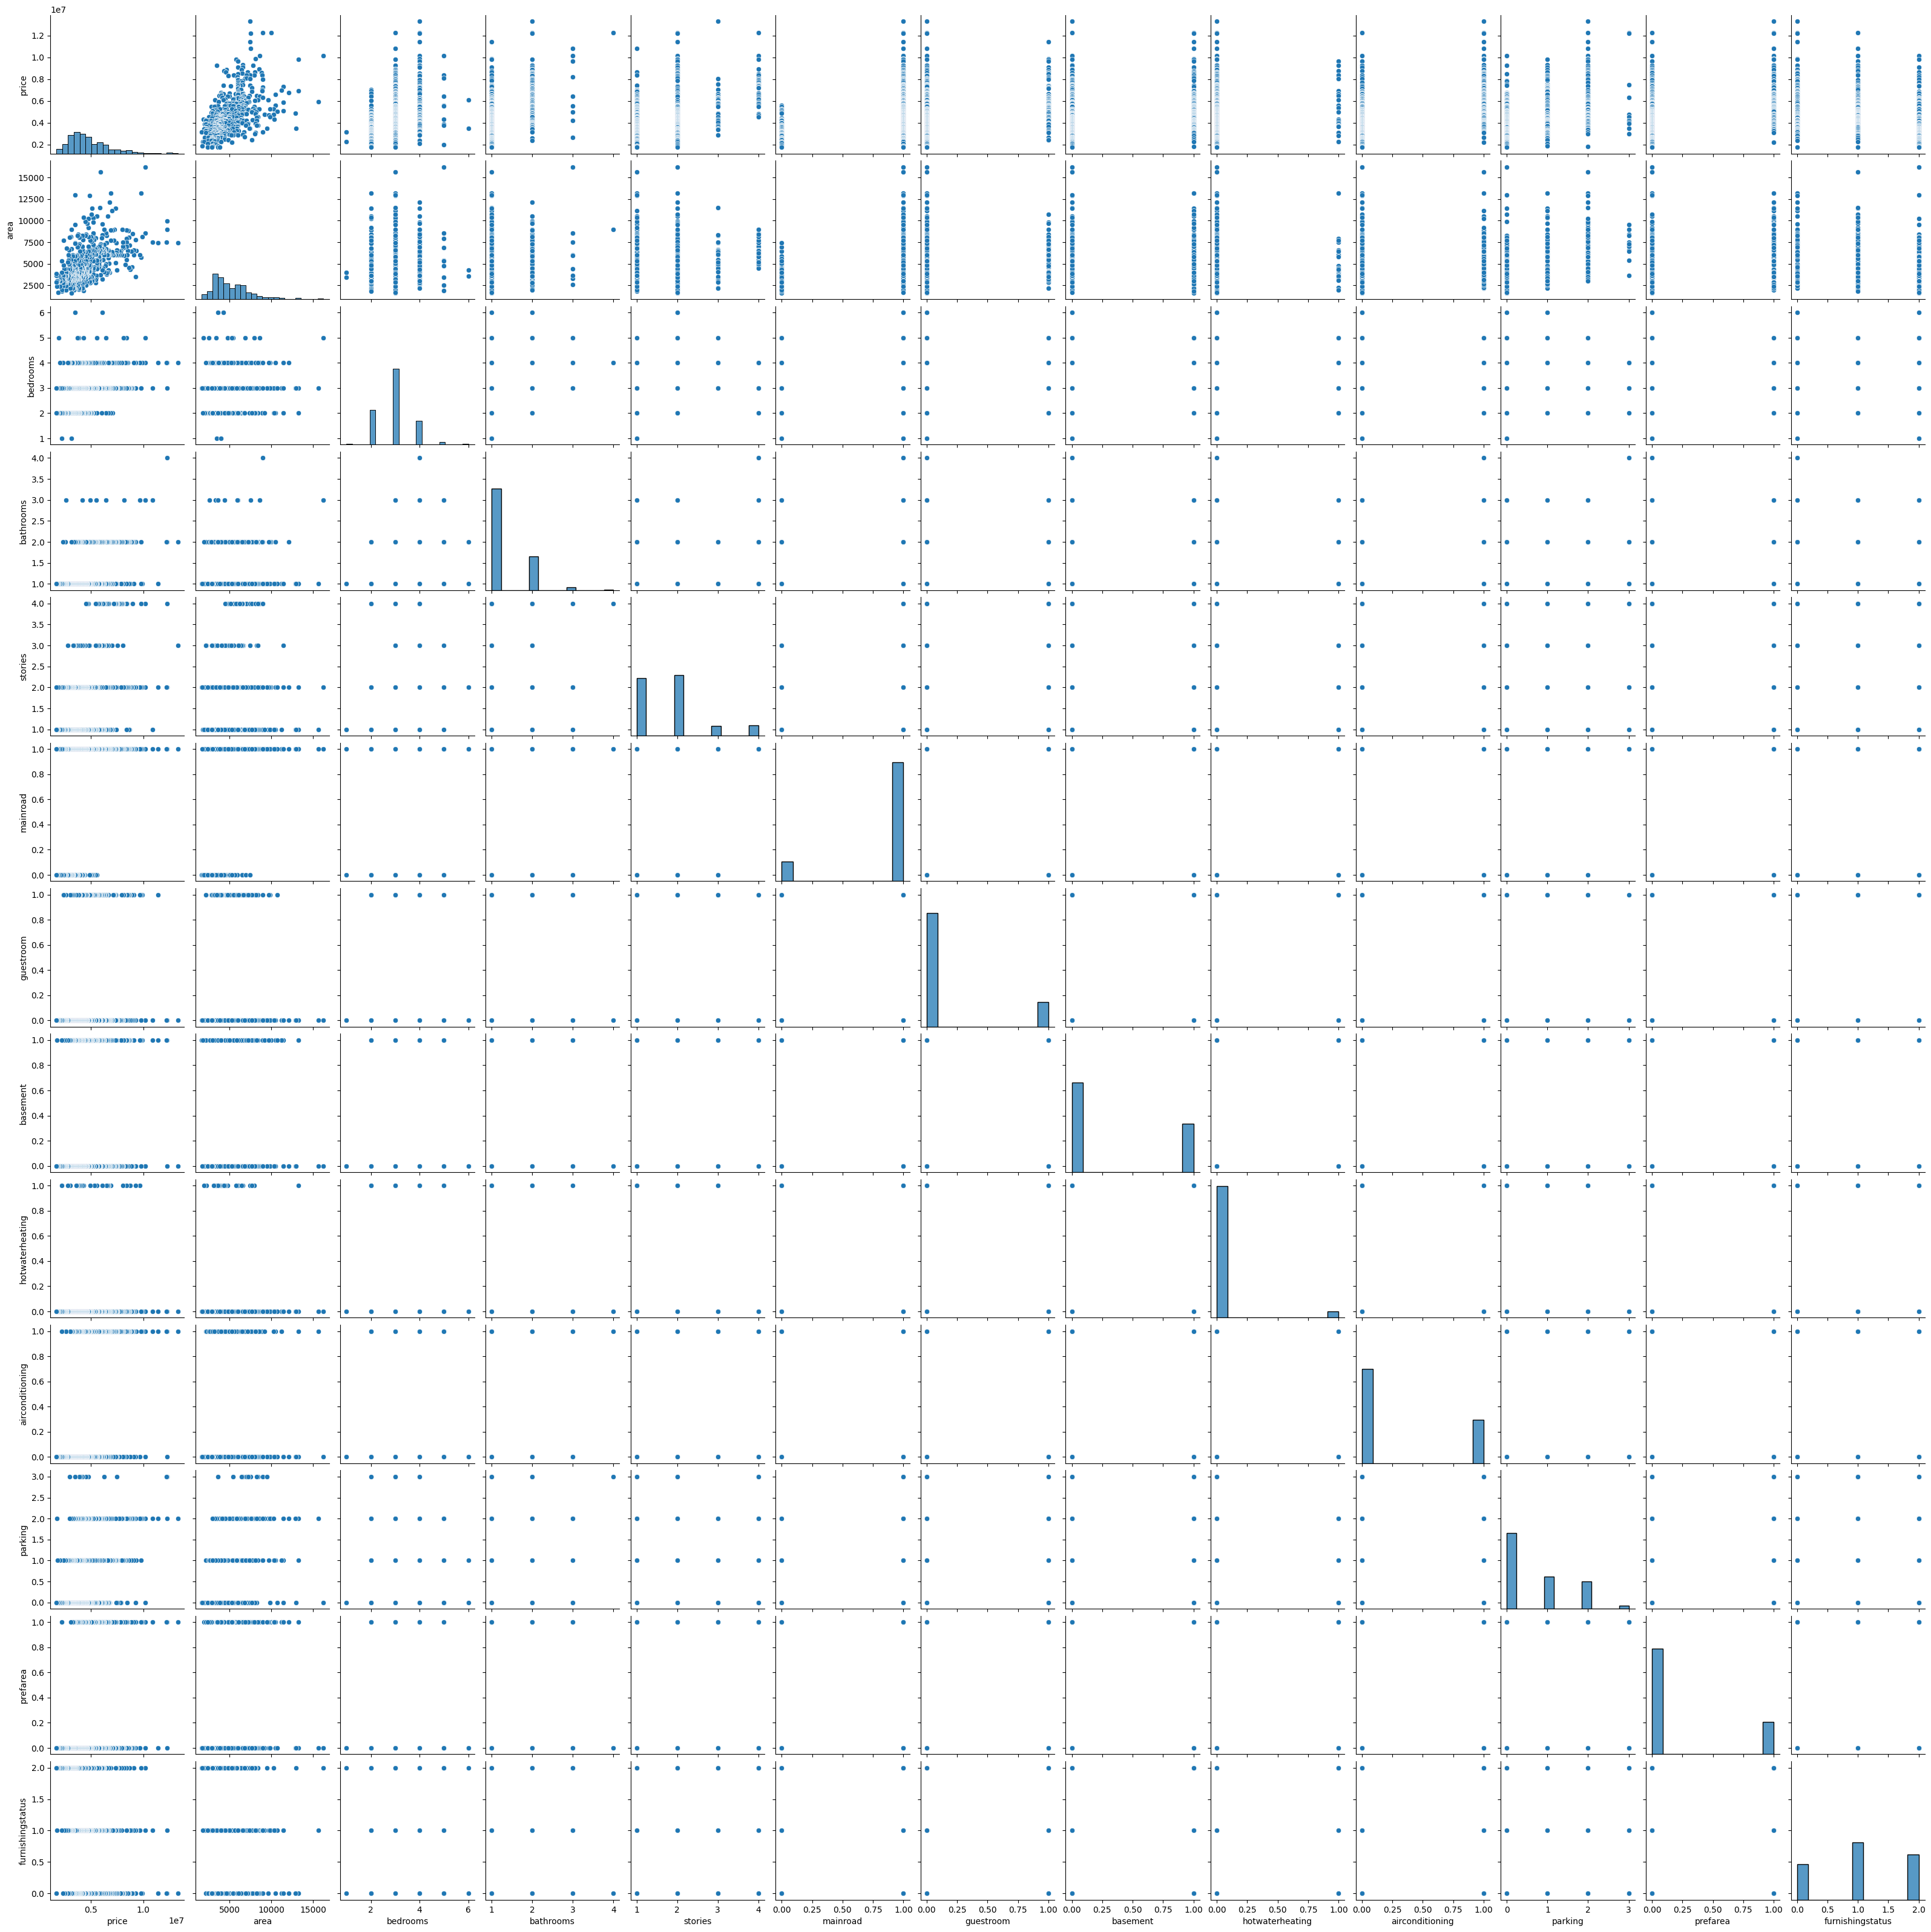

In [718]:
sns.pairplot(data)

In [719]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


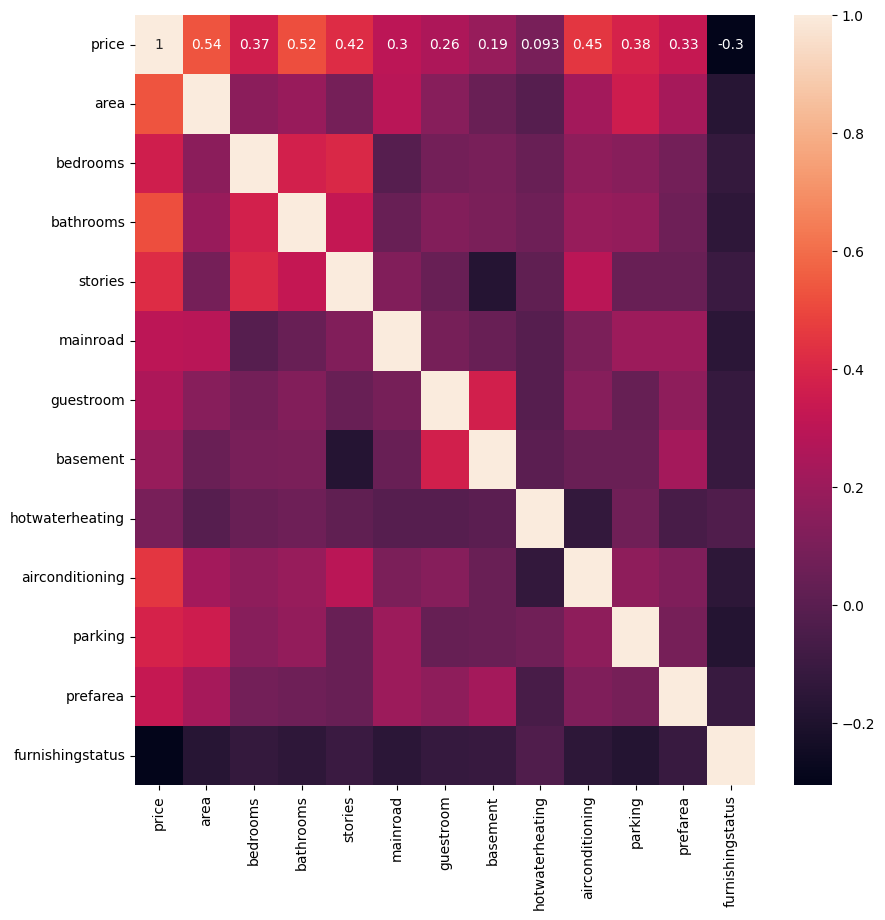

In [720]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(),annot=True)
plt.show()

In [721]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
y

0      0
1      0
2      1
3      0
4      0
      ..
540    2
541    1
542    2
543    0
544    2
Name: furnishingstatus, Length: 545, dtype: int64

In [722]:
sc = StandardScaler()
sc.fit(x)
sc.transform(x)

array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.4726183 ,
         1.51769249,  1.80494113],
       [ 4.00448405,  1.75700953,  1.40341936, ...,  1.4726183 ,
         2.67940935, -0.55403469],
       [ 4.00448405,  2.21823241,  0.04727831, ..., -0.67906259,
         1.51769249,  1.80494113],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, ..., -0.67906259,
        -0.80574124, -0.55403469],
       [-1.61432675, -1.03338891,  0.04727831, ..., -0.67906259,
        -0.80574124, -0.55403469],
       [-1.61432675, -0.5998394 ,  0.04727831, ..., -0.67906259,
        -0.80574124, -0.55403469]])

In [723]:
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [724]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [725]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [726]:
lr.score(X_test,y_test) * 100

2.8483319816072883

In [727]:
lr.coef_

array([-0.20205605,  0.03654158,  0.00657589,  0.03108353, -0.04520773,
       -0.06036896, -0.00894049, -0.07245169, -0.00813358, -0.0098828 ,
       -0.06569575,  0.01531345])

<BarContainer object of 12 artists>

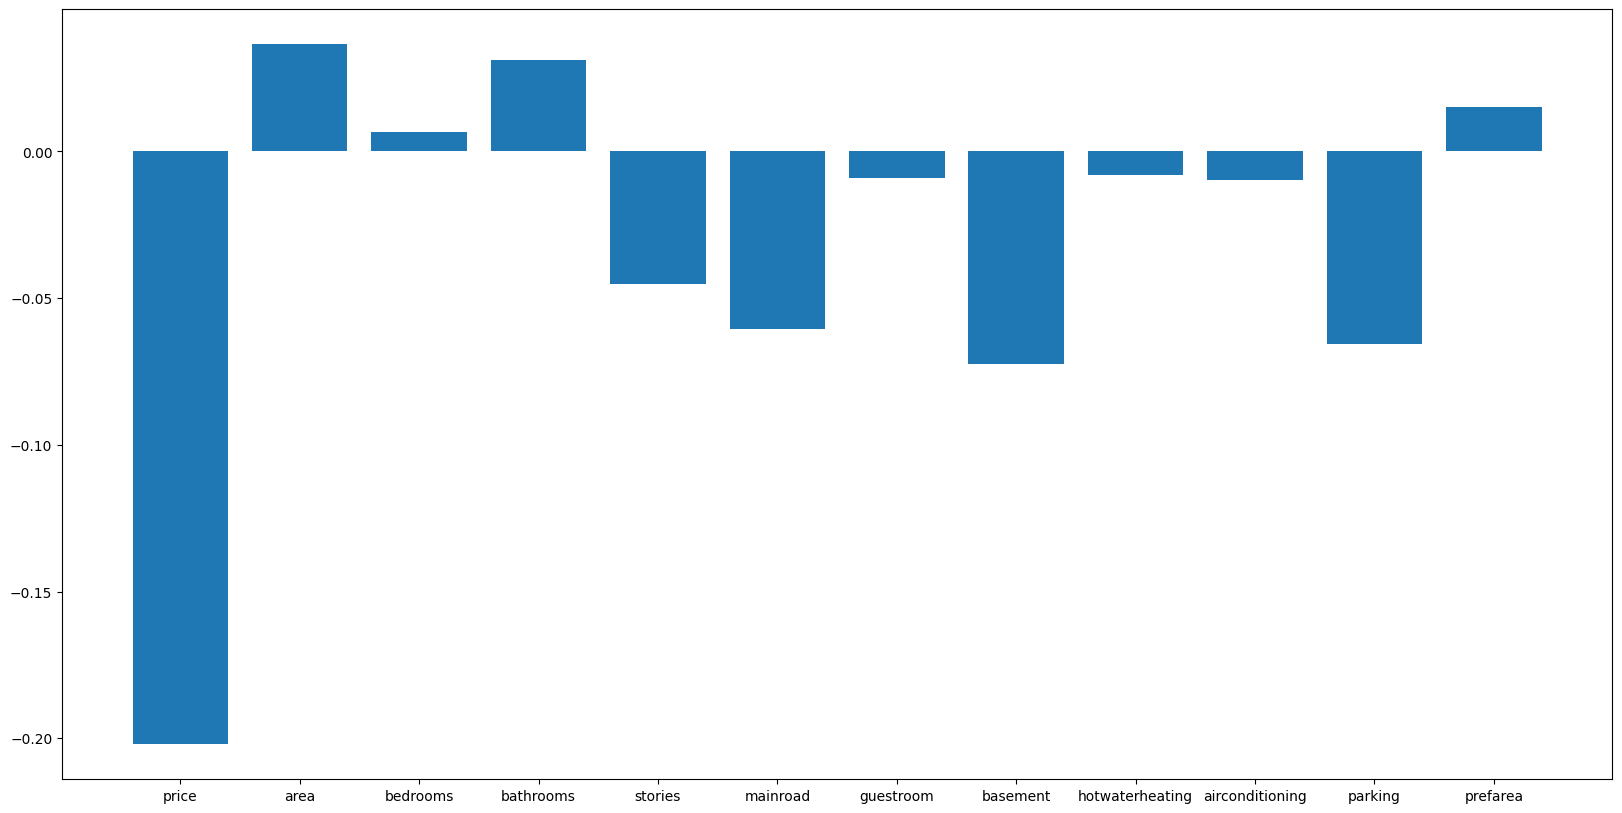

In [728]:
plt.figure(figsize=(20,10))
plt.bar(x.columns,lr.coef_)

In [729]:
la=Lasso(alpha=0.5)
la.fit(X_train,y_train)
la.score(X_test,y_test) * 100

-0.4040876302431329

<BarContainer object of 12 artists>

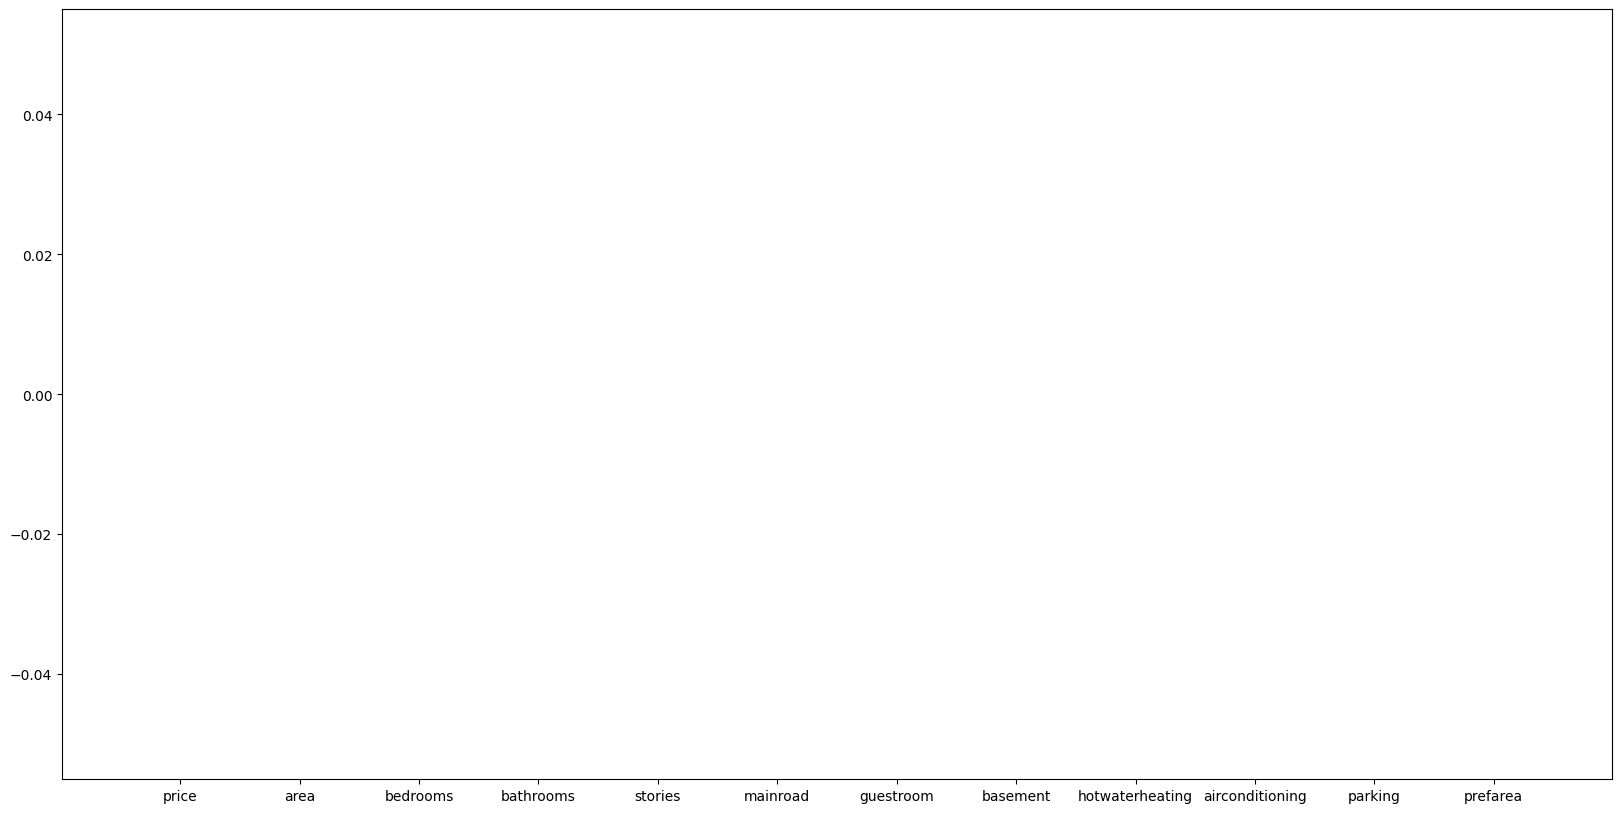

In [730]:
plt.figure(figsize=(20,10))
plt.bar(x.columns,la.coef_)

In [731]:
ri=Ridge(alpha=0.5)
ri.fit(X_train,y_train)
ri.score(X_test,y_test) * 100

2.8717311116045696

<BarContainer object of 12 artists>

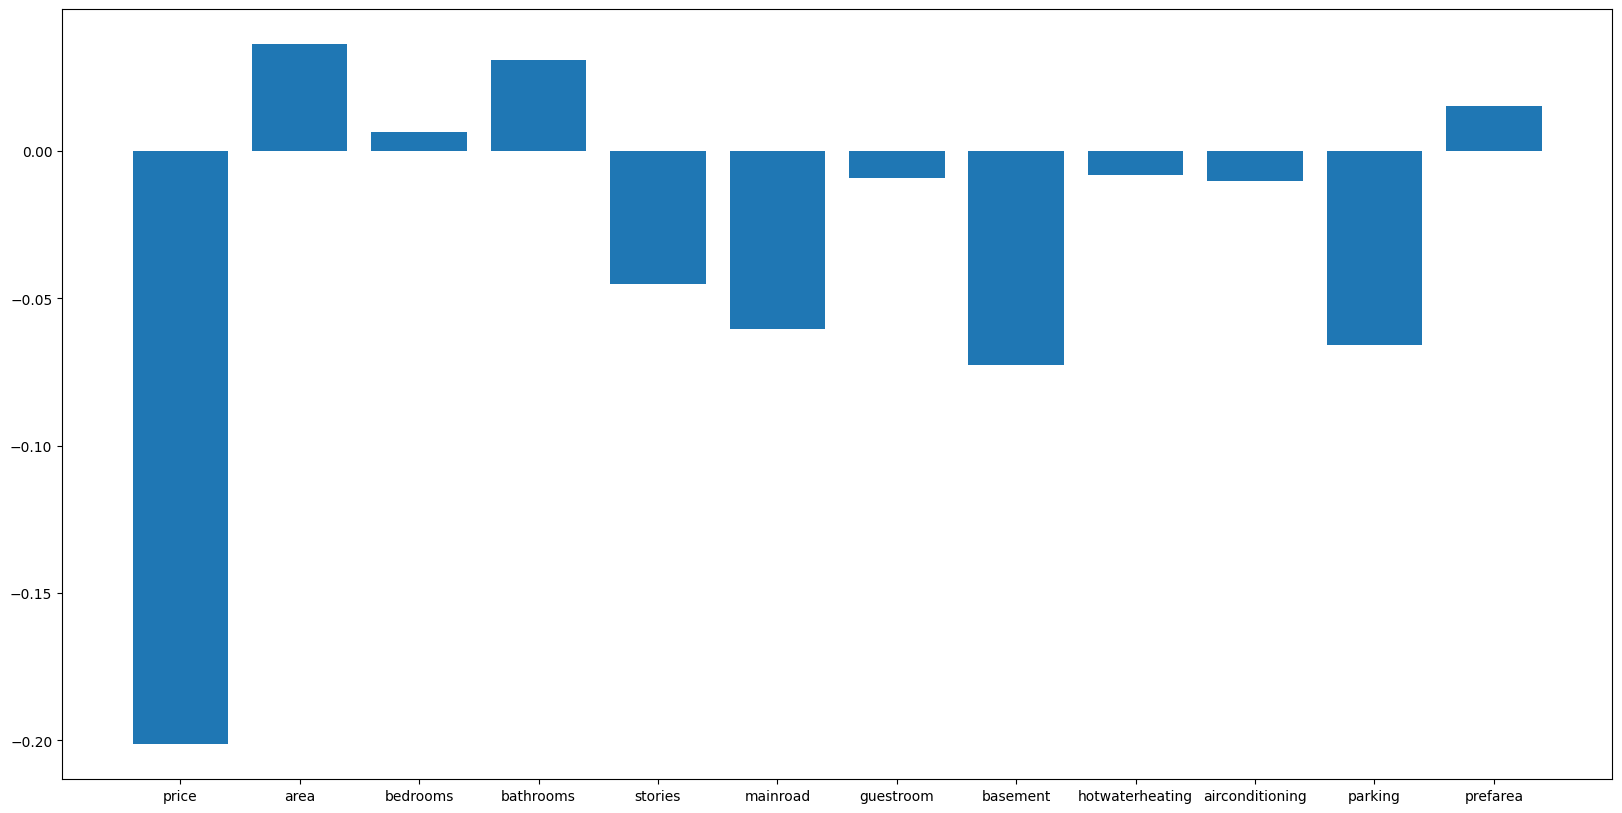

In [732]:
plt.figure(figsize=(20,10))
plt.bar(x.columns,ri.coef_)

In [733]:
df = pd.DataFrame({'col_name':x.columns,'LinearRegression':lr.coef_,'Ridge':ri.coef_,'Lasso':la.coef_})
df

,col_name,LinearRegression,Ridge,Lasso
0,price,-0.202056,-0.201287,-0.0
1,area,0.036542,0.036259,-0.0
2,bedrooms,0.006576,0.006523,-0.0
3,bathrooms,0.031084,0.030777,-0.0
4,stories,-0.045208,-0.045248,-0.0
5,mainroad,-0.060369,-0.060360,-0.0
6,guestroom,-0.008940,-0.009002,-0.0
7,basement,-0.072452,-0.072410,-0.0
8,hotwaterheating,-0.008134,-0.008195,-0.0
9,airconditioning,-0.009883,-0.010058,-0.0


In [734]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


<Axes: xlabel='bedrooms', ylabel='mainroad'>

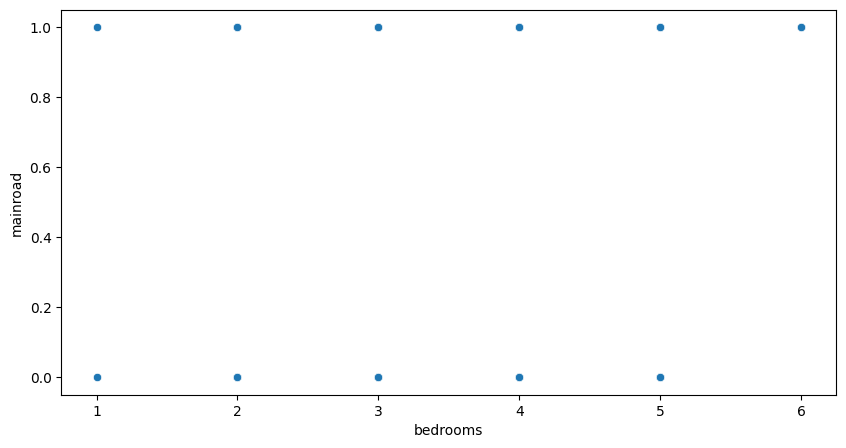

In [735]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='bedrooms',y='mainroad',data =data)

In [736]:
x = data[['bedrooms']]
y = data[['mainroad']]

In [737]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [738]:
lr = LogisticRegression()

In [739]:
lr.fit(x_train,y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [740]:
lr.score(x_test,y_test)

0.8623853211009175

In [741]:
x_test

,bedrooms
316,4
77,3
360,2
90,3
493,3
...,...
15,4
357,4
39,4
54,3


In [742]:
y_test

,mainroad
316,0
77,1
360,1
90,1
493,1
...,...
15,1
357,0
39,1
54,1


In [743]:
lr.predict([[54]])

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

<Axes: xlabel='bedrooms', ylabel='mainroad'>

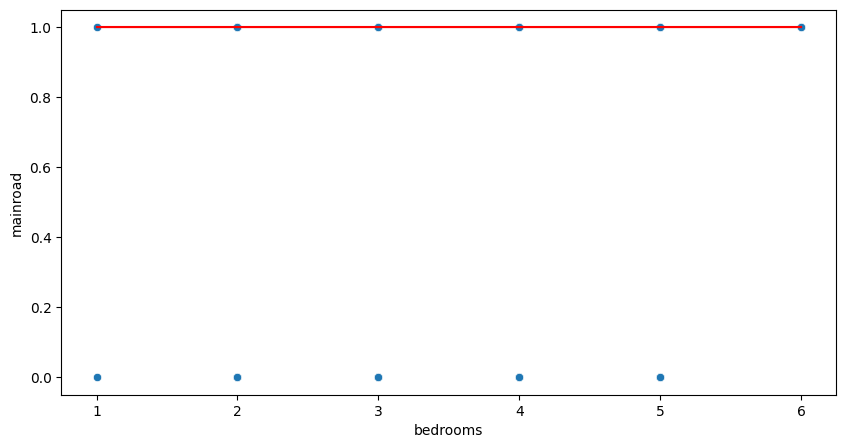

In [744]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='bedrooms',y='mainroad',data =data)
sns.lineplot(x='bedrooms',y=lr.predict(x),data=data,color='red')

In [745]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [746]:
x.fillna(0,inplace=True)
y.fillna(0,inplace=True)



C:\Users\DELL\AppData\Local\Temp\ipykernel_19392\1353240625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(0,inplace=True)


In [747]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [748]:
lr = LogisticRegression()

lr.fit(x_train,y_train)


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [749]:
x_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
316,4060000,5900,4,2,2,0,0,1,0,0,1,0
77,6650000,6500,3,2,3,1,0,0,0,1,0,1
360,3710000,4040,2,1,1,1,0,0,0,0,0,0
90,6440000,5000,3,1,2,1,0,0,0,1,0,0
493,2800000,3960,3,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15,9100000,6000,4,1,2,1,0,1,0,0,2,0
357,3773000,6930,4,1,2,0,0,0,0,0,1,0
39,7910000,6000,4,2,4,1,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0


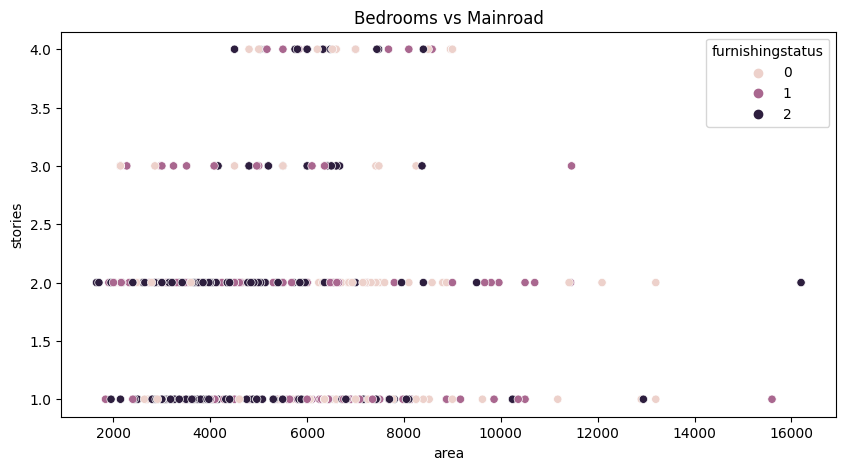

In [750]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='area',y='stories',data =data,hue='furnishingstatus')
plt.title('Bedrooms vs Mainroad')
plt.show()

In [751]:
y_test

316    2
77     0
360    1
90     1
493    0
      ..
15     1
357    0
39     1
54     1
155    0
Name: furnishingstatus, Length: 109, dtype: int64

In [752]:
lr.predict([[5530000,6100,3,2,1,1,0,1,0,0,2,1]])

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [753]:
lr.score(x_test,y_test)

0.3669724770642202

In [754]:
from mlxtend.plotting import plot_decision_regions,decision_regions

In [755]:
x.ndim

2

In [756]:
#plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)

# with polynomial feature  

In [803]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [804]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [805]:
data['species'] = data['species'].map({'setosa':0,'versicolor':1,'virginica':2})

<Axes: xlabel='sepal_length', ylabel='petal_length'>

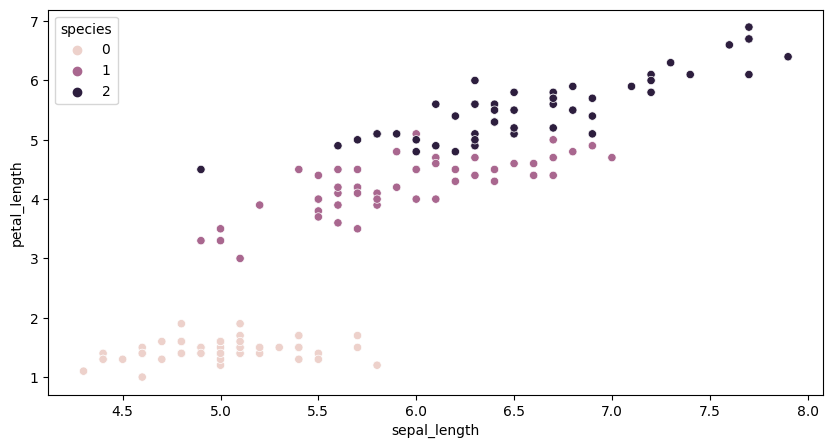

In [806]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='sepal_length',y='petal_length',hue='species',data=data)

In [767]:
#data = data[data['species']!=2]

In [807]:
# x = data.iloc[:,:-1]
# y = data.iloc[:,-1]
x = data[['sepal_length','petal_length']]
y = data['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [808]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [809]:
lr.score(x_test,y_test)* 100

100.0

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

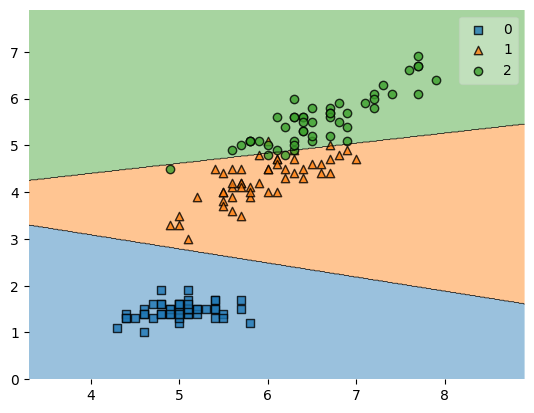

In [810]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)

In [811]:
pl = PolynomialFeatures(degree=3)
pl.fit(x)
x = pd.DataFrame(pl.transform(x))

In [812]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [813]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [815]:
#plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)

In [816]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


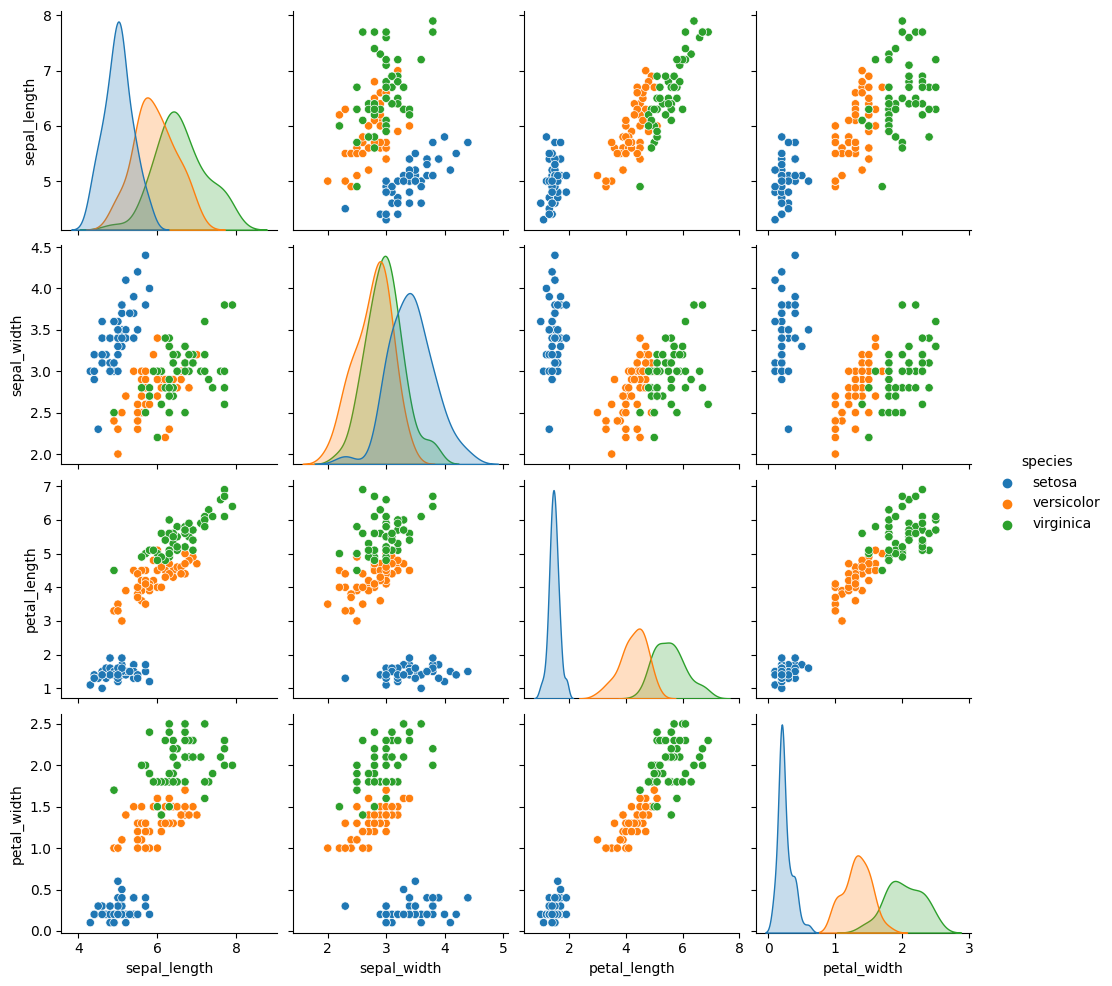

In [817]:
sns.pairplot(data,hue='species')

In [819]:
data['species'] = data['species'].map({'setosa':0,'versicolor':1,'virginica':2})

<Axes: >

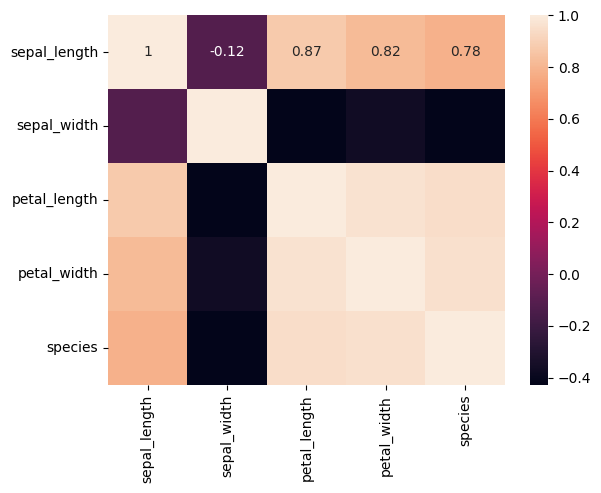

In [820]:
sns.heatmap(data.corr(),annot=True)

In [827]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [828]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [824]:
lr = LogisticRegression(multi_class='ovr') # OVR 
lr.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [826]:
lr.score(x_test,y_test) * 100

96.66666666666667

In [829]:
lr = LogisticRegression(multi_class='multinomial') # OVR 
lr.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [830]:
lr.score(x_test,y_test) * 100

100.0

In [832]:
confusion_matrix(y_test,lr.predict(x_test))

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<Axes: >

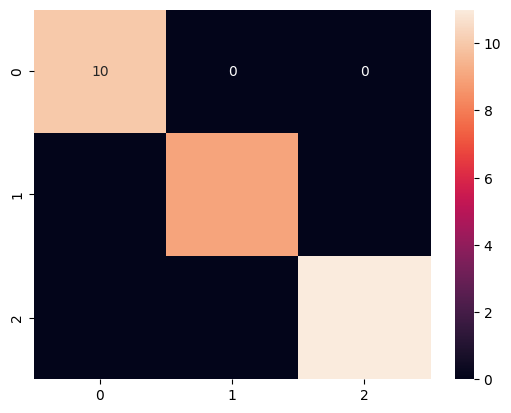

In [835]:
sns.heatmap(confusion_matrix(y_test,lr.predict(x_test)),annot=True)

In [838]:
from sklearn.metrics import classification_report,precision_score,accuracy_score,recall_score,f1_score
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [1]:
# pip install imbalanced-learn
# pip install imblearn 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ModuleNotFoundError: No module named 'imblearn'